In [3]:
import seaborn as sns
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as dates
from matplotlib import dates as mdates
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,max_error
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 300
rcParams["font.size"] = 16
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24
sns.set_style("whitegrid")
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
import optuna
from pickle import dump,load
from funciones import *

optunah14GRU


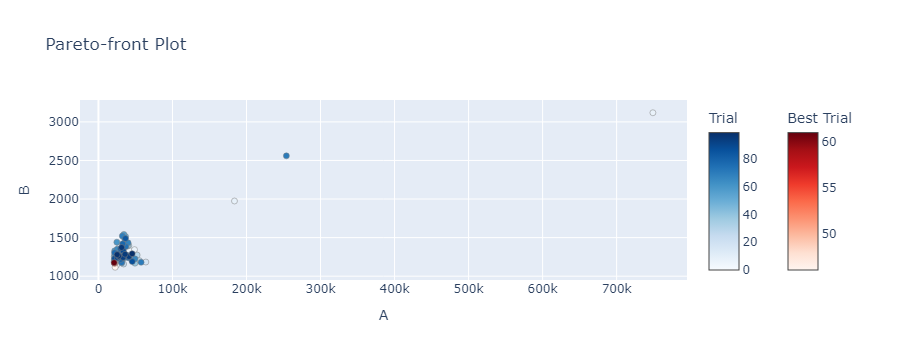

In [5]:
study=load( open('model_optimization_GRU.pkl', 'rb'))
print(modelo)
fig = optuna.visualization.plot_pareto_front(study,target_names=["A", "B"])
fig.show()

In [2]:
lists=['optunah14GRU']
for modelo in lists:
    study=load( open('modelos/'+modelo+'.pkl', 'rb'))
    print(modelo)
    fig = optuna.visualization.plot_pareto_front(study,target_names=["RMSE", "MAXERROR"])
    fig.show()
    print(f"Number of trials on the Pareto front: {len(study.best_trials)}")

    trial_with_highest_accuracy = max(study.best_trials, key=lambda t: t.values[1])
    print(f"Trial with highest accuracy: ")
    print(f"\tnumber: {trial_with_highest_accuracy.number}")
    print(f"\tparams: {trial_with_highest_accuracy.params}")
    print(f"\tvalues: {trial_with_highest_accuracy.values}")
    fig=optuna.visualization.plot_param_importances(study, target=lambda t: t.values[0], target_name="RMSE")
    fig.show()
    fig=optuna.visualization.plot_param_importances(study, target=lambda t: t.values[1], target_name="MAXERROR")
    fig.show()   
# trials = study.get_trials()
    frozen_trials = study.get_trials()

    # Convert the frozen trials list to a Pandas DataFrame
    data = []
    for trial in frozen_trials:
        if(trial.state==optuna.trial.TrialState.COMPLETE):
            trial_values = trial.values
            trial_params = trial.params
            trial_user_attrs = trial.user_attrs
            row = {}
            row['trial']= trial.number
            for i, value in enumerate(trial_values):
                row[f'value_{i}'] = value
            for key, value in trial_params.items():
                row[key] = value
            for key, value in trial_user_attrs.items():
                row[key] = value
            data.append(row)
    df = pd.DataFrame(data)
    print(len(df))
    print(df.sort_values(by=['value_0','value_1']).head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'modelos/optunah14GRU.pkl'

In [ ]:
import numpy as np

def exponential_decay_weights(seq_length, decay_factor):
    weights = np.exp(-decay_factor * np.arange(seq_length))
    return weights / np.sum(weights)  # Normalize weights to sum up to 1

# Example usage
seq_length = 28  # Length of the time series
decay_factor = 0.05  # Controls the rate of decay
weights = exponential_decay_weights(seq_length, decay_factor)
def growing_exponential_weights(seq_length, growth_factor):
    weights = np.exp(growth_factor * np.arange(seq_length))
    return weights / np.sum(weights)  # Normalize weights to sum up to 1

# Example usage
seq_length = 28  # Length of the time series
growth_factor = 0.05  # Controls the rate of growth
weights = growing_exponential_weights(seq_length, growth_factor)
print(weights)
plt.plot(weights)

In [ ]:
lists=['optunah28LSTMFinal','optunah28LSTMFinalmasanhos']
for modelo in lists:
    study=load( open('modelos/'+modelo+'.pkl', 'rb'))
    print(modelo)
    fig = optuna.visualization.plot_pareto_front(study,target_names=["RMSE", "MAXERROR"])
    fig.show()
    print(f"Number of trials on the Pareto front: {len(study.best_trials)}")

    trial_with_highest_accuracy = max(study.best_trials, key=lambda t: t.values[1])
    print(f"Trial with highest accuracy: ")
    print(f"\tnumber: {trial_with_highest_accuracy.number}")
    print(f"\tparams: {trial_with_highest_accuracy.params}")
    print(f"\tvalues: {trial_with_highest_accuracy.values}")
    fig=optuna.visualization.plot_param_importances(study, target=lambda t: t.values[0], target_name="RMSE")
    fig.show()
    fig=optuna.visualization.plot_param_importances(study, target=lambda t: t.values[1], target_name="MAXERROR")
    fig.show()   
# trials = study.get_trials()
    frozen_trials = study.get_trials()

    # Convert the frozen trials list to a Pandas DataFrame
    data = []
    for trial in frozen_trials:
        if(trial.state==optuna.trial.TrialState.COMPLETE):
            trial_values = trial.values
            trial_params = trial.params
            trial_user_attrs = trial.user_attrs
            row = {}
            row['trial']= trial.number
            for i, value in enumerate(trial_values):
                row[f'value_{i}'] = value
            for key, value in trial_params.items():
                row[key] = value
            for key, value in trial_user_attrs.items():
                row[key] = value
            data.append(row)
    df = pd.DataFrame(data)
    print(len(df))
    print(df.sort_values(by=['value_0','value_1']).head(10))

 

In [ ]:
 print(df.sort_values(by=['value_1','value_0']).head(30))

 

In [94]:
#datos_norm = cargar_dataset()
horizonte = 28
tamanio_ventana=365
cantidad_unidades=15
epocas=50
tamanio_batch=15 
dropout=0.125727 
features_set=3
year_ini=78
arch='LSTM'# cambiar tambien el elemento
modelo=arch+'_h'+str(horizonte)+'_w'+str(tamanio_ventana)+'_u'+str(cantidad_unidades)
modelo+='_d'+str(dropout)
modelo+='_f'+str(features_set)
modelo+='_y'+str(year_ini)
test=load( open('modelomejor/test.pkl', 'rb'))


horizonte = 28
tamanio_ventana=730
cantidad_unidades=60
epocas=50
tamanio_batch=365    
arch='LSTM'
modelo=arch+'_h'+str(horizonte)+'_w'+str(tamanio_ventana)+'_u'+str(cantidad_unidades)
   

MSE: 0.4821853518063054
RMSE: 0.6943956738101883
R2: 0.8904543120979028
MAPE: 1.2657355424412917
MAXERRO: 3.9164746141433713


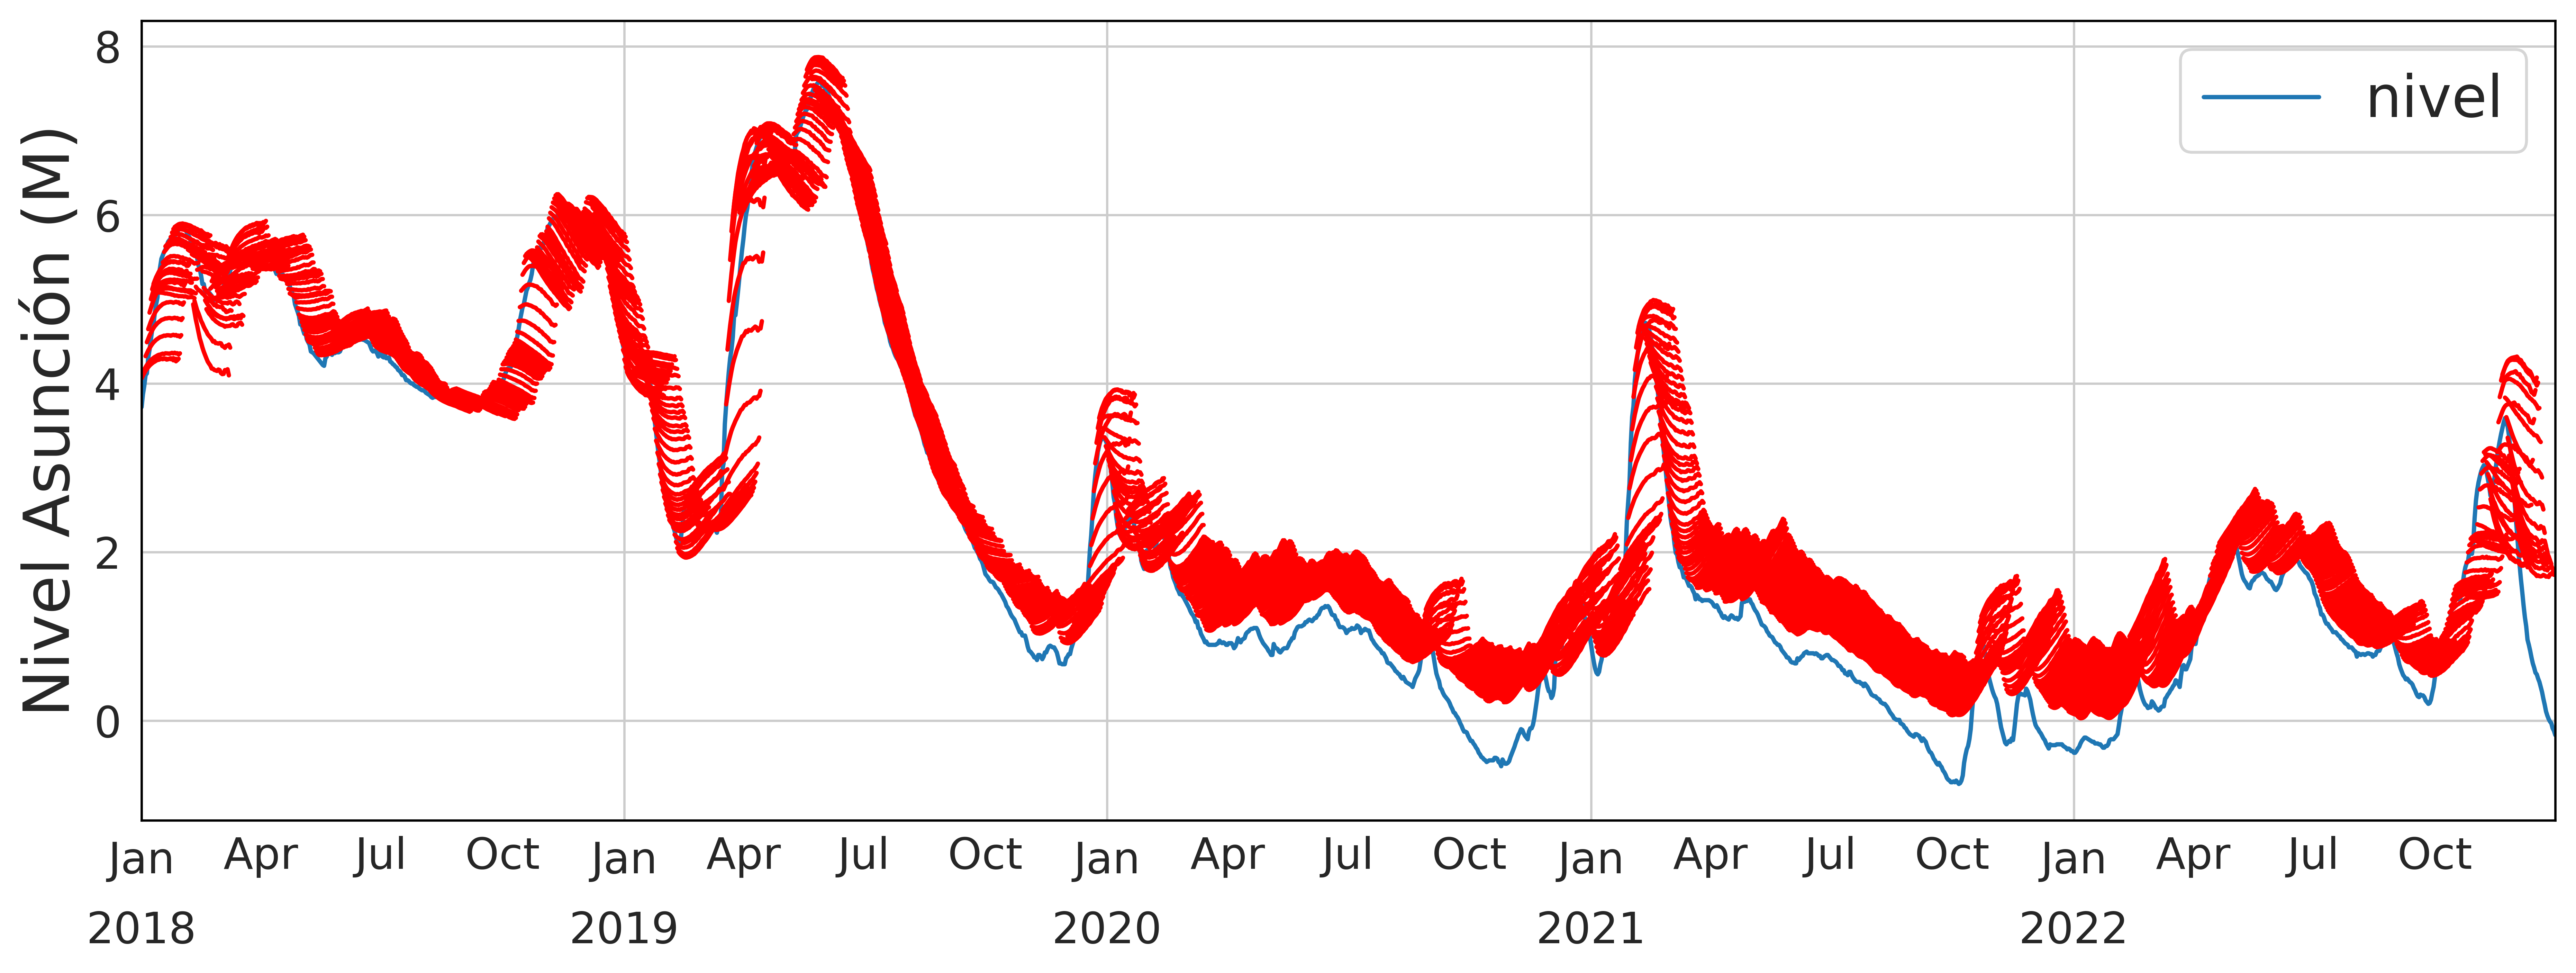

In [95]:
if(True):
    
    Y_prediction=load( open('modelomejor/testpred'+modelo+'.pkl', 'rb'))

    x_val, y_val=preparar_datos(tamanio_ventana,horizonte, test)
    Y_val = y_val.reshape(-1)

    print('MSE:',mean_squared_error(np.array(Y_val), Y_prediction))
    print('RMSE:',np.sqrt(mean_squared_error(np.array(Y_val), Y_prediction)))
    print('R2:',r2_score(np.array(Y_val), Y_prediction))
    print('MAPE:',mean_absolute_percentage_error(np.array(Y_val), Y_prediction))
    
    print('MAXERRO:',max_error(np.array(Y_val), Y_prediction))
    df=test[['nivel']][ tamanio_ventana:]


    f, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(data =df,ax=ax)
    fmt_month = mdates.MonthLocator(interval=3)
    # Minor ticks every year.
    fmt_year = mdates.YearLocator()

    ax.xaxis.set_minor_locator(fmt_month)
    # '%b' to get the names of the month
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(fmt_year)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # fontsize for month labels
    ax.tick_params(labelsize=15, which='both')
    # create a second x-axis beneath the first x-axis to show the year in YYYY format
    sec_xaxis = ax.secondary_xaxis(-0.1)
    sec_xaxis.xaxis.set_major_locator(fmt_year)
    sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Hide the second x-axis spines and ticks
    sec_xaxis.spines['bottom'].set_visible(False)
    sec_xaxis.tick_params(length=0, labelsize=15)

    ax.set_ylabel('Nivel Asunción (M)')
    ax.set_xlabel('')

    ax.set_xlim(df.index[0],df.index[-1])
    j=0
    mse=[]
    maxe=[]
    t=[]
    for i in range(0, len(Y_prediction),horizonte):
        if(j%1==0 and (j+horizonte)<len(df)):
            mse.append(mean_squared_error(np.array(df.nivel[j:(j+horizonte)]), Y_prediction[i:i+horizonte]))
            maxe.append(max_error(np.array(df.nivel[j:(j+horizonte)]), Y_prediction[i:i+horizonte]))
            t.append(df.index[j])

            plt.plot(df.index[j:(j+horizonte)], Y_prediction[i:i+horizonte], color='red')
        j=j+1                                          

    plt.show()
#plt.savefig("timeSeriesTest.png")

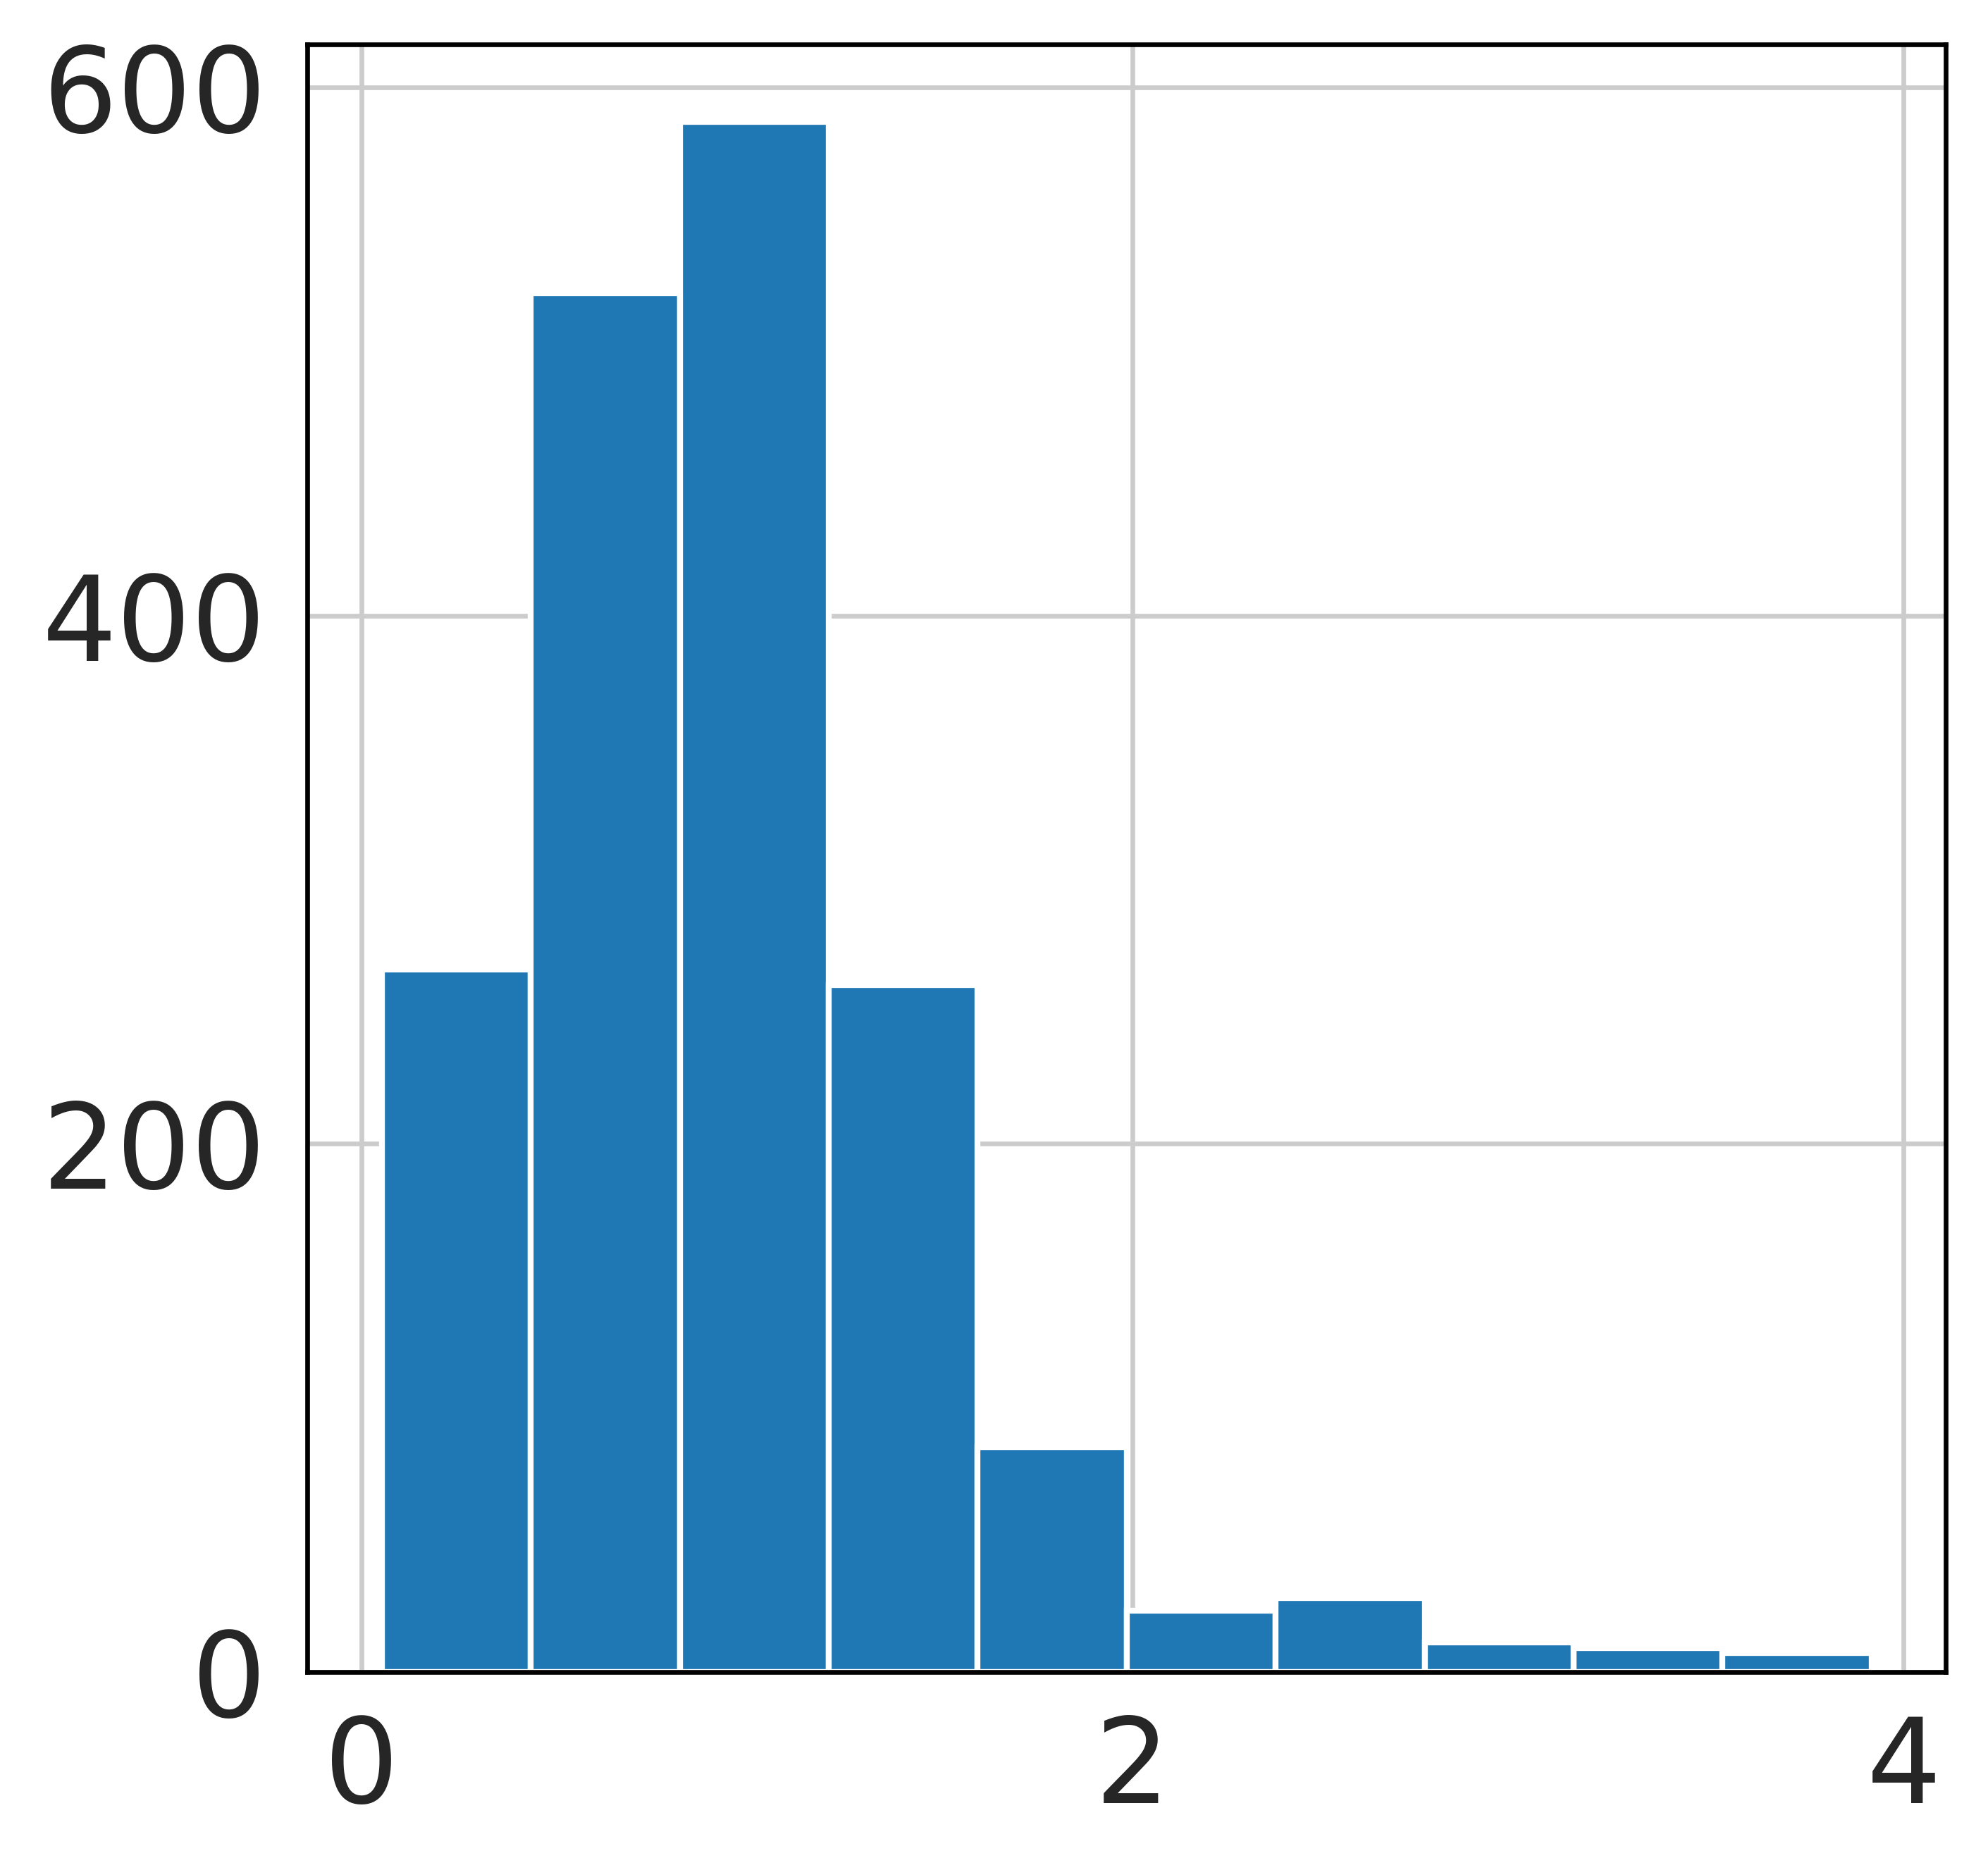

In [78]:
fig=plt.figure(figsize=(5,5))
plt.hist((maxe));
plt.savefig("testhistMaxerr.png")

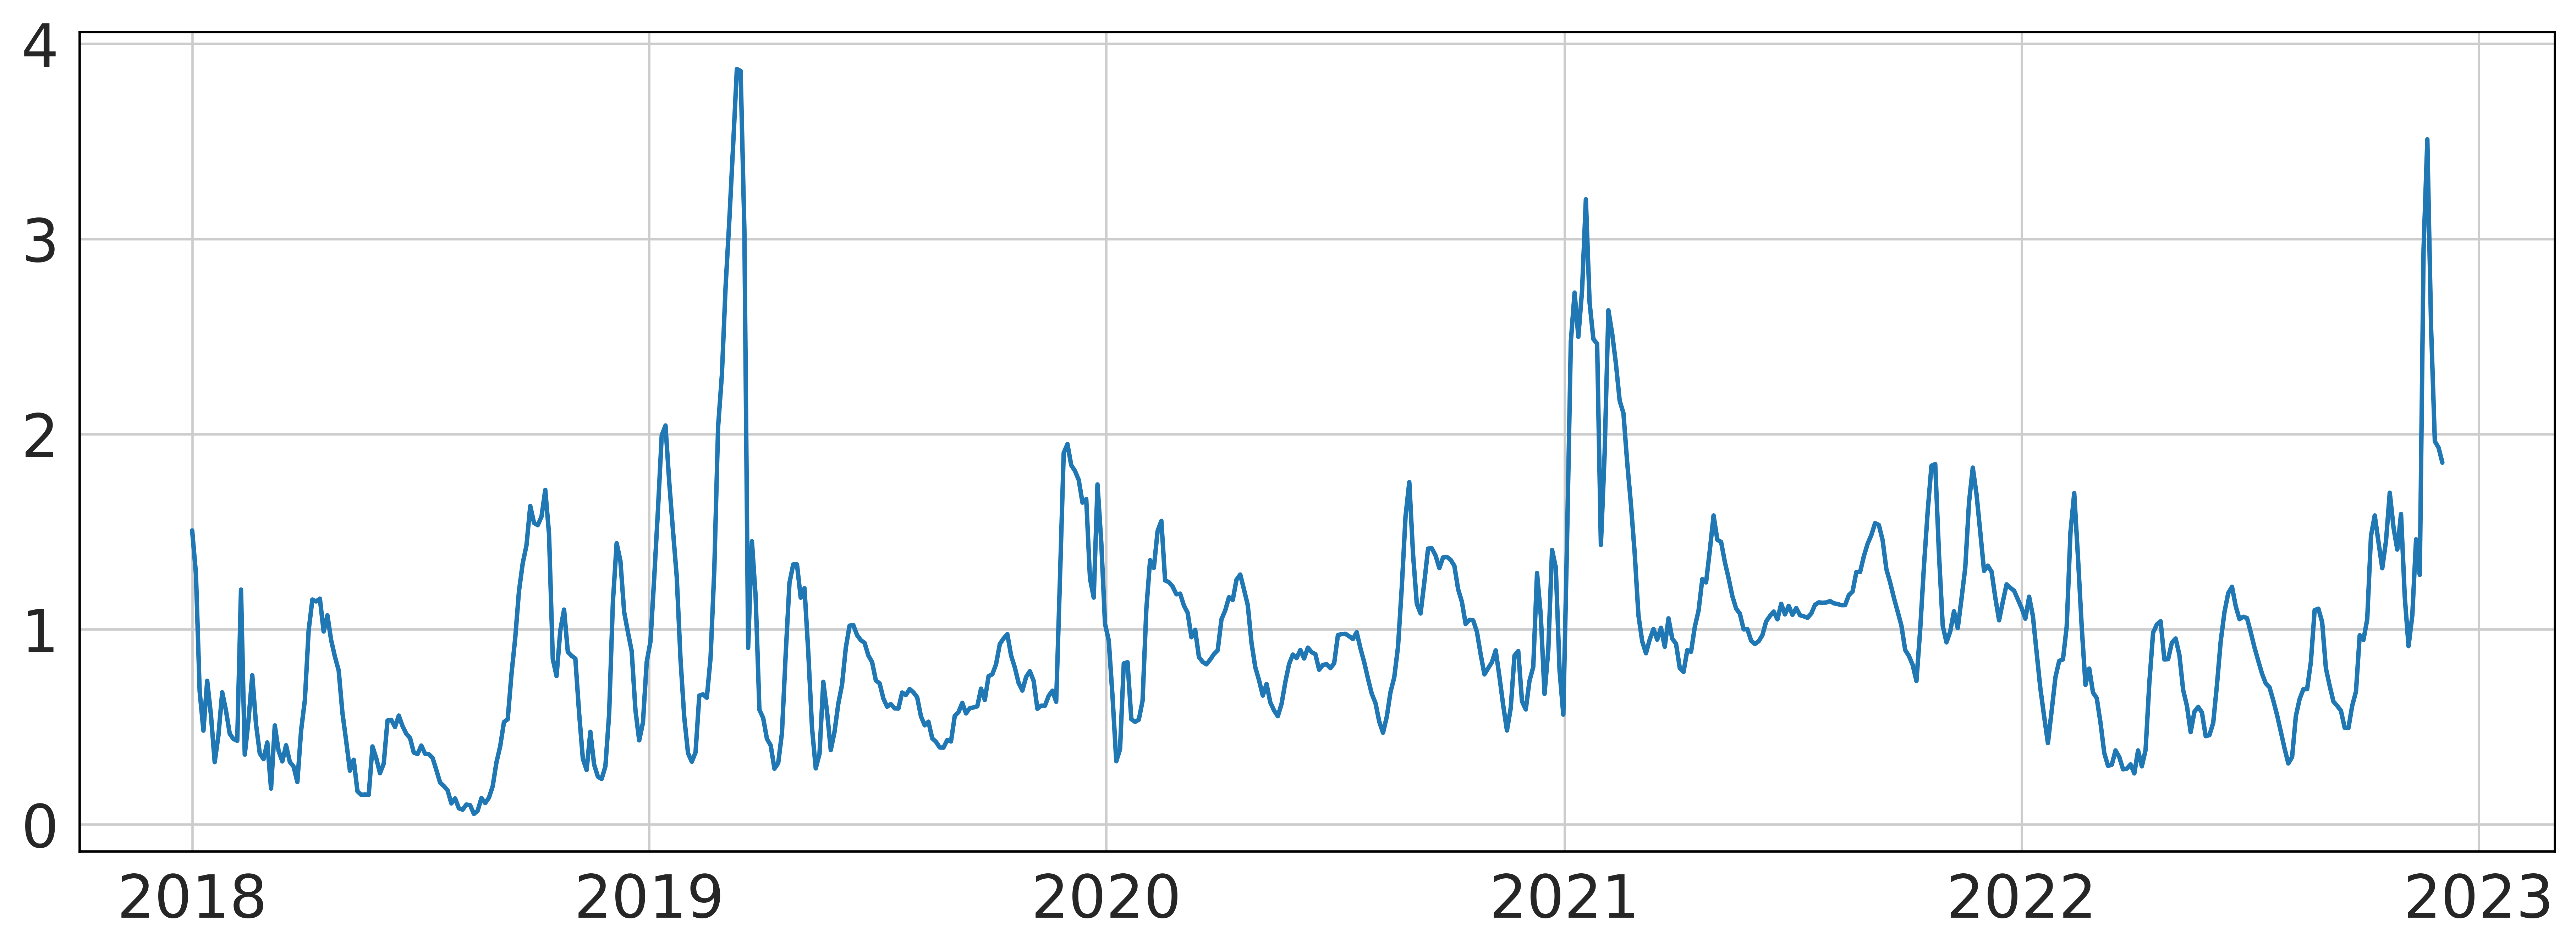

In [74]:
fig=plt.figure(figsize=(15,5))

plt.plot(t,maxe)
plt.savefig("testMaxerr.png")

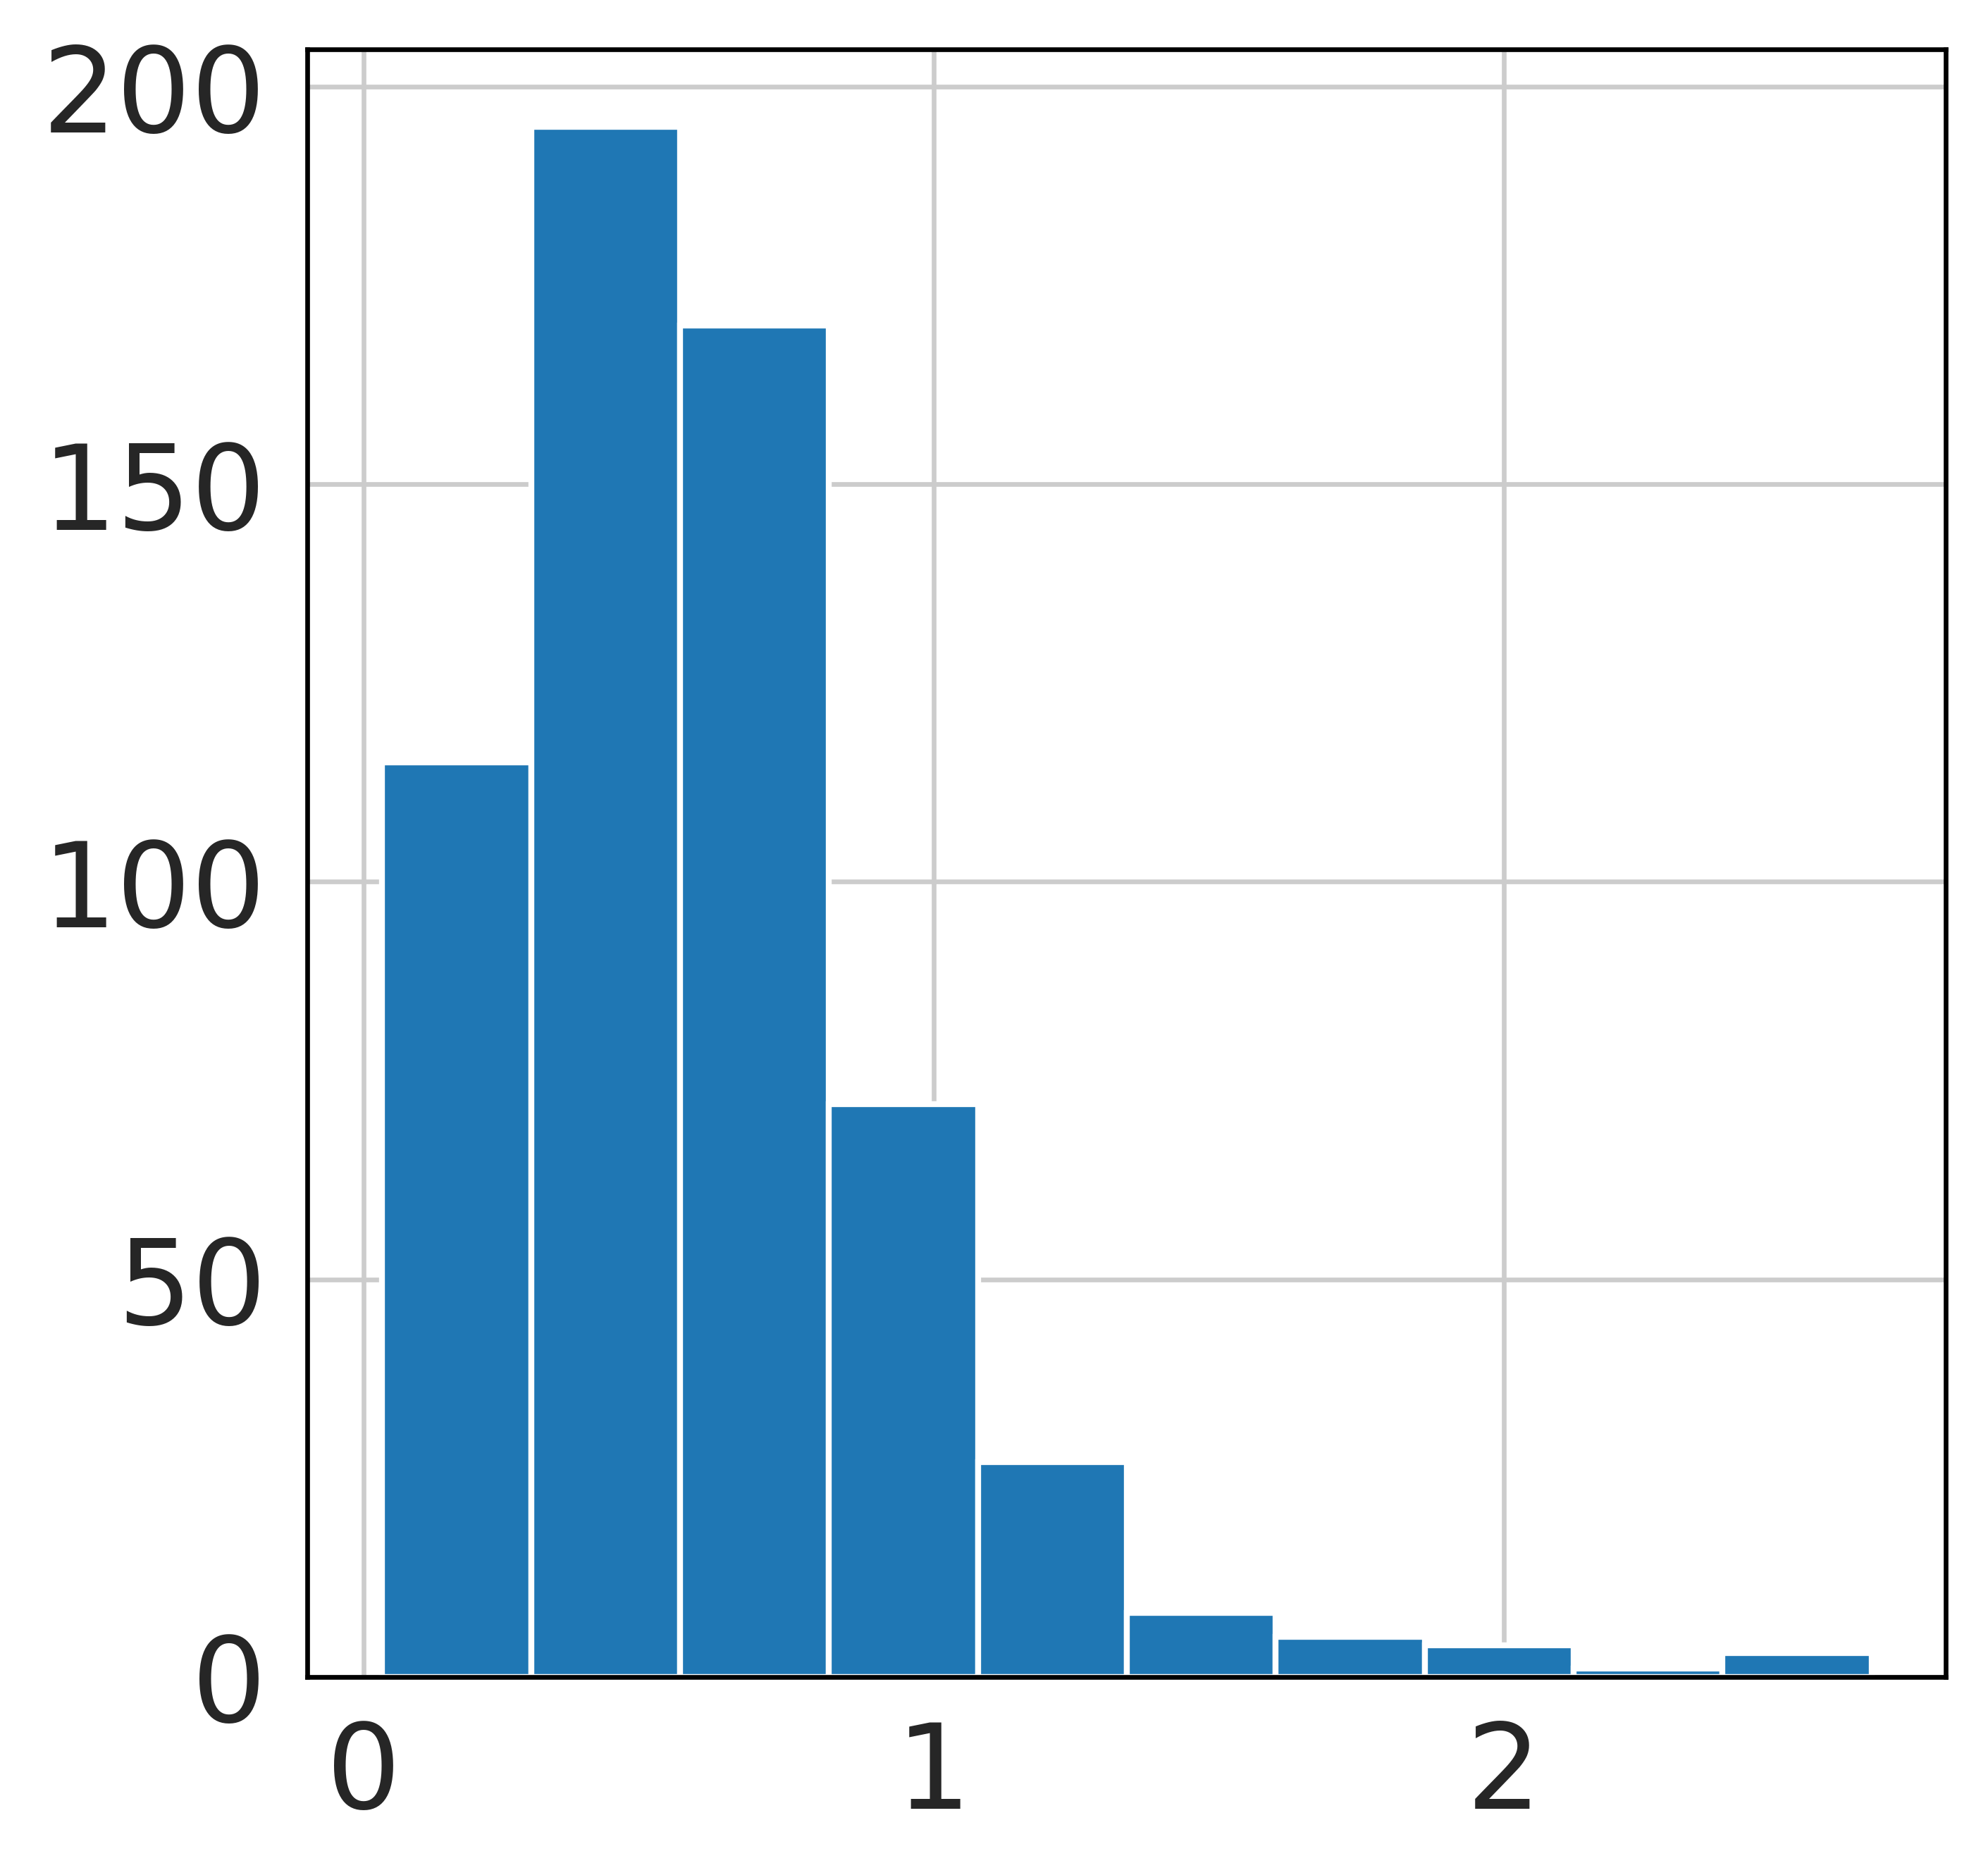

In [75]:
fig=plt.figure(figsize=(5,5))

plt.hist(np.sqrt(mse));
plt.savefig("testhistrmse.png")

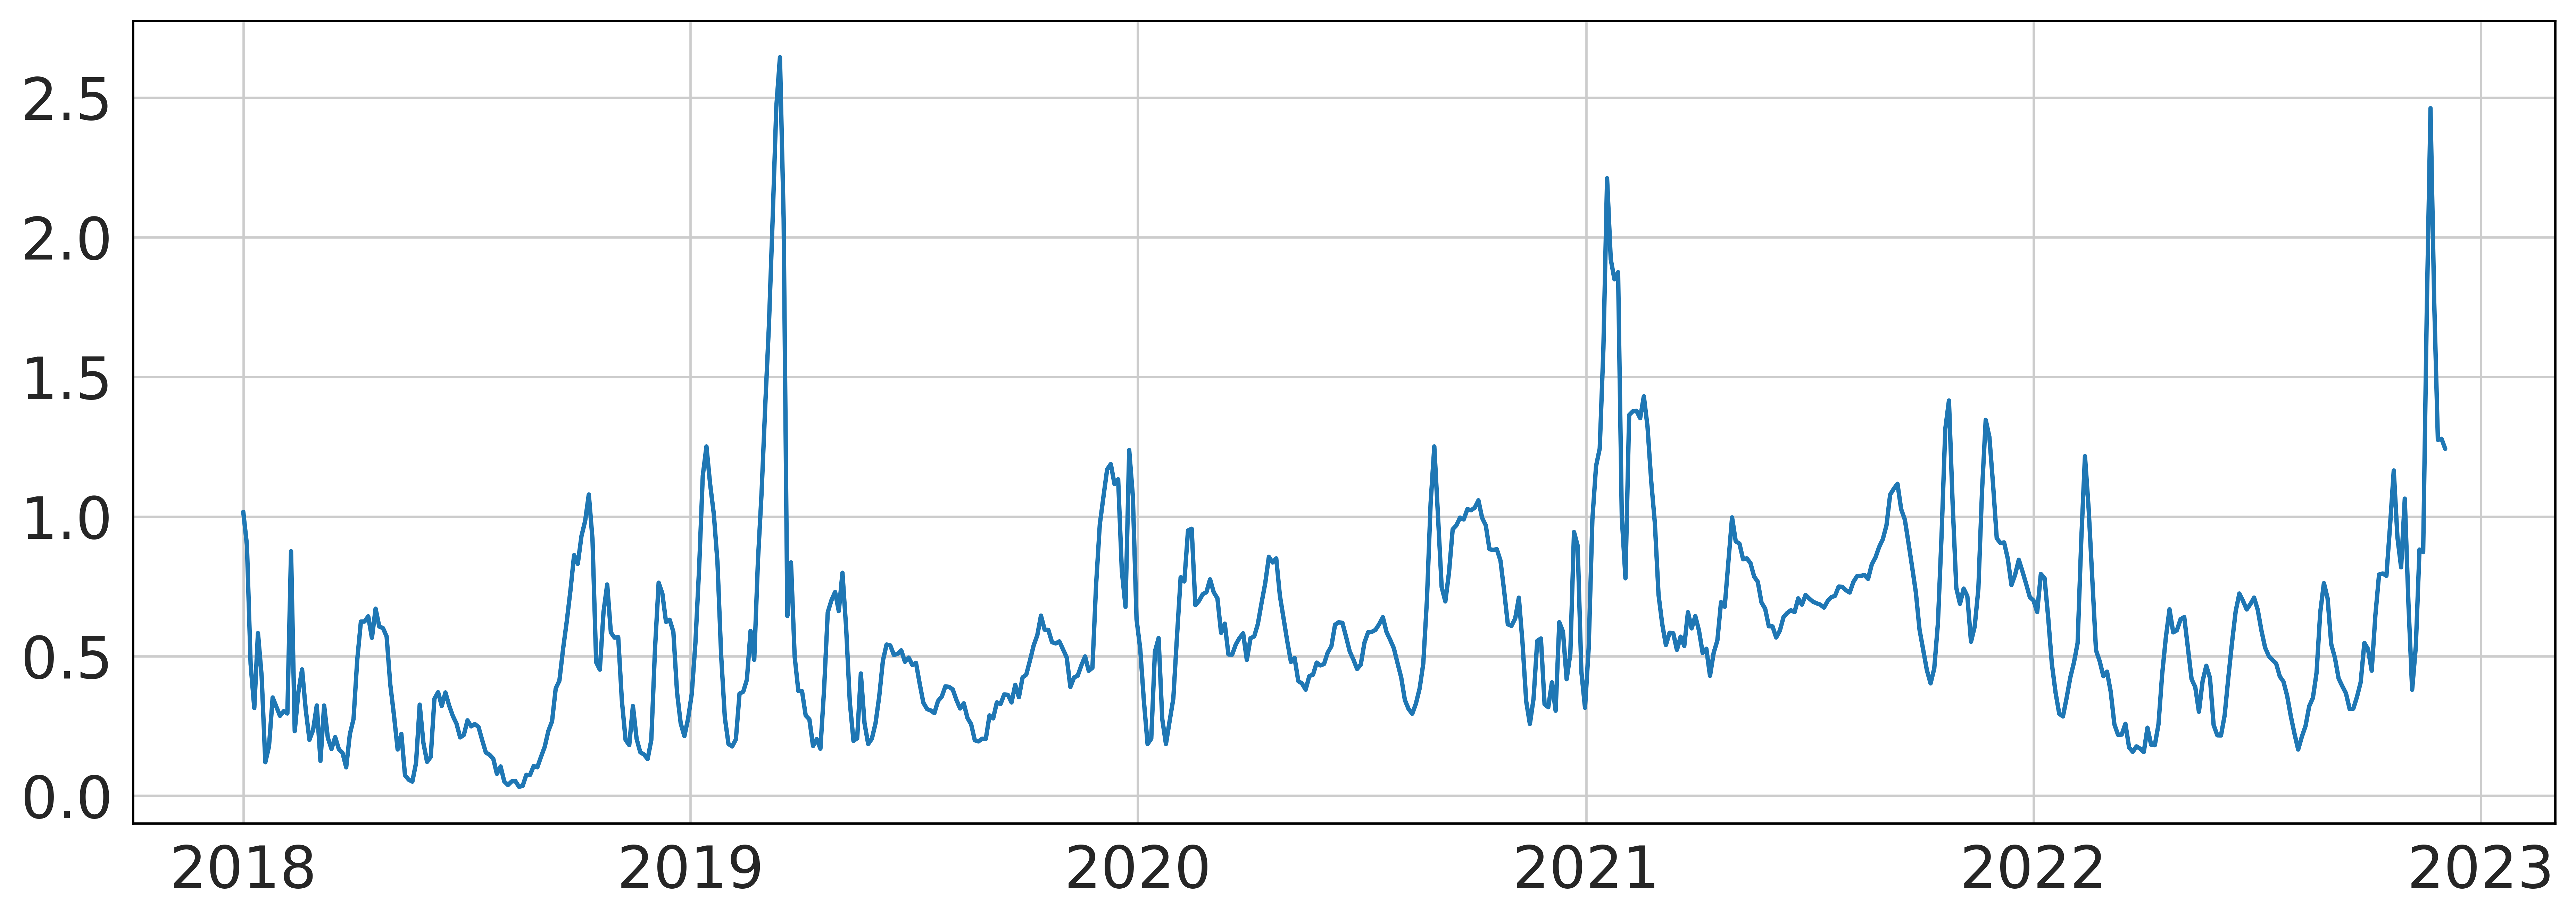

In [76]:
fig=plt.figure(figsize=(15,5))

plt.plot(t,np.sqrt(mse));
plt.savefig("testtrmse.png")

In [4]:
test=load( open('modelos/val.pkl', 'rb'))
Y_prediction=load( open('modelos/valpred'+modelo+'.pkl', 'rb'))

x_val, y_val=preparar_datos(tamanio_ventana,horizonte, test)
Y_val = y_val.reshape(-1)

print('MSE:',mean_squared_error(np.array(Y_val), Y_prediction))
print('RMSE:',np.sqrt(mean_squared_error(np.array(Y_val), Y_prediction)))
print('R2:',r2_score(np.array(Y_val), Y_prediction))
print('MAPE:',mean_absolute_percentage_error(np.array(Y_val), Y_prediction))
df=test[['nivel']][ tamanio_ventana:]


MSE: 0.4772353792686935
RMSE: 0.6908222486781195
R2: 0.8298546774057758
MAPE: 0.12492179565497233


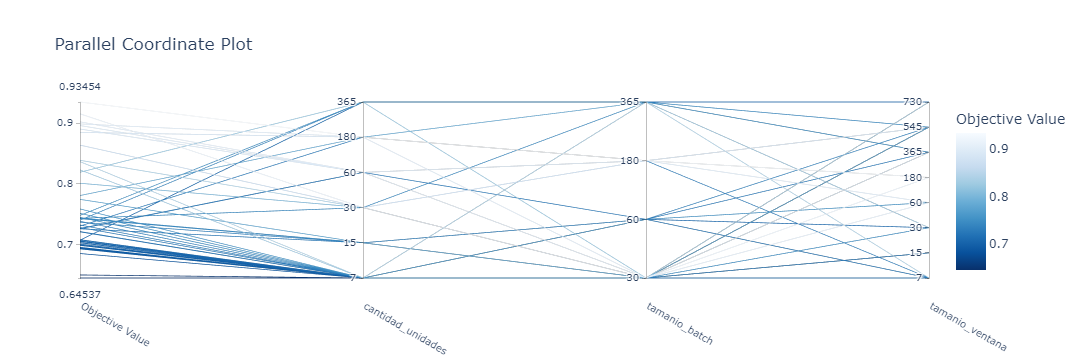

In [5]:

#study=load( open('modelos/optunah28GRU.pkl', 'rb'))
#study=load( open('modelos/optunah7GRU.pkl', 'rb'))
#study=load( open('modelos/optunah7LSTM.pkl', 'rb'))
study=load( open('modelos/optunah28LSTMfeaturesMes.pkl', 'rb'))
#study=load( open('modelos/optunah7RNN.pkl', 'rb'))
optuna.visualization.plot_param_importances(study)
optuna.visualization.plot_parallel_coordinate(study)

In [7]:

lists=['optunah28GRU','optunah28LSTMfeaturesMes','optunah7GRU_v0','optunah7RNN_v0']
for modelo in lists:
    study=load( open('modelos/'+modelo+'.pkl', 'rb'))
    print(modelo)
    top_trials = sorted(study.get_trials(), key=lambda t: t.value)[:5]

    # print trial_id and value
    for trial in top_trials:
       # print(f"Trial {trial.number}: Value {trial.value}")
        print(f'Trial #{trial.number}, value: {trial.value}, user attrs: {trial.user_attrs}')
        # print parameter values of top trials
        for key, value in trial.params.items():
            print(f"    {key}: {value}")

optunah28GRU
Trial #39, value: 0.4029147206346006, user attrs: {}
    tamanio_ventana: 60
    cantidad_unidades: 365
Trial #29, value: 0.4235015657579912, user attrs: {}
    tamanio_ventana: 180
    cantidad_unidades: 365
Trial #41, value: 0.42415281317929554, user attrs: {}
    tamanio_ventana: 60
    cantidad_unidades: 365
Trial #36, value: 0.43142124973901025, user attrs: {}
    tamanio_ventana: 60
    cantidad_unidades: 180
Trial #21, value: 0.433696545477325, user attrs: {}
    tamanio_ventana: 730
    cantidad_unidades: 365
optunah28LSTMfeaturesMes
Trial #16, value: 0.6453659910548009, user attrs: {'score': 0.6453659910548009, 'min_score': 0.6286476974751899, 'max_score': 0.6649594708277643, 'elapsed_time': 398.3609588940938}
    tamanio_ventana: 365
    cantidad_unidades: 7
    tamanio_batch: 30
Trial #13, value: 0.6503613344326667, user attrs: {'score': 0.6503613344326667, 'min_score': 0.6417186325388937, 'max_score': 0.659049326805986, 'elapsed_time': 798.5448559125265}
    ta

optunah7RNN


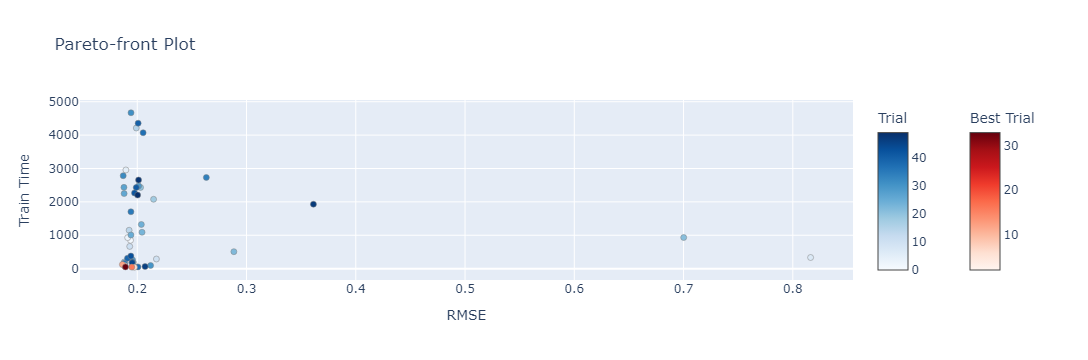

Number of trials on the Pareto front: 6
Trial with highest accuracy: 
	number: 12
	params: {'tamanio_ventana': 30, 'cantidad_unidades': 180}
	values: [0.1863818038669347, 122.5532938639323]


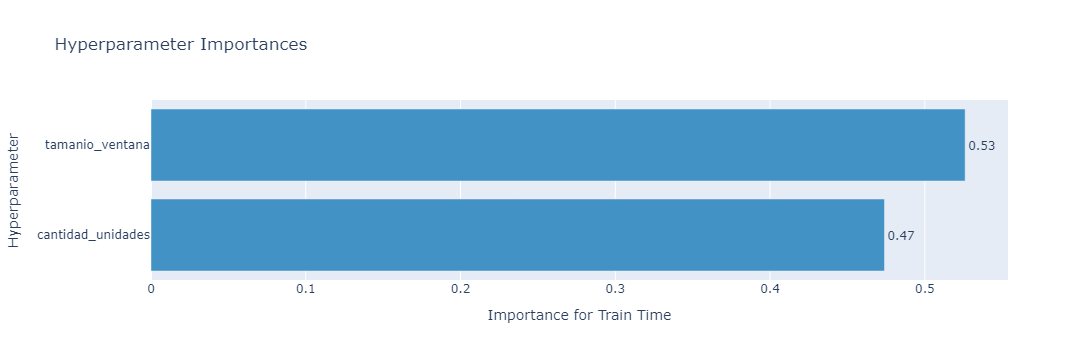

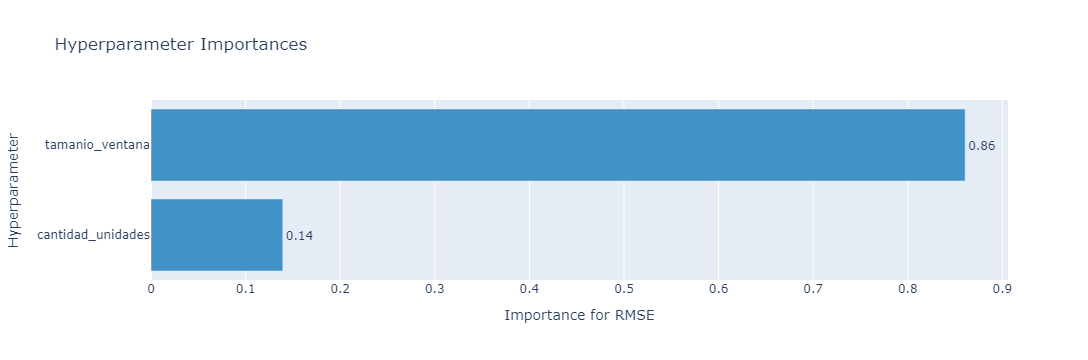

50
    trial   value_0      value_1  tamanio_ventana  cantidad_unidades  \
12     12  0.186382   122.553294               30                180   
32     32  0.187113  2783.153435              730                 30   
27     27  0.187800  2434.963866              545                 60   
26     26  0.187960  2248.849587              365                 15   
19     19  0.188096   197.846721               30                 60   
36     36  0.188124   161.644361               30                 30   
2       2  0.188388    93.593664                7                 15   
8       8  0.188656    70.252888                7                 15   
17     17  0.189016   174.718571               30                180   
33     33  0.189187    51.339717                7                365   

    mean_rmse  min_rmse  max_rmse  maxError_mean   r2_mean  elapsed_time  
12   0.186382  0.181631  0.192847       1.951494  0.987546    122.553294  
32   0.187113  0.181482  0.191400       1.907539  0.98

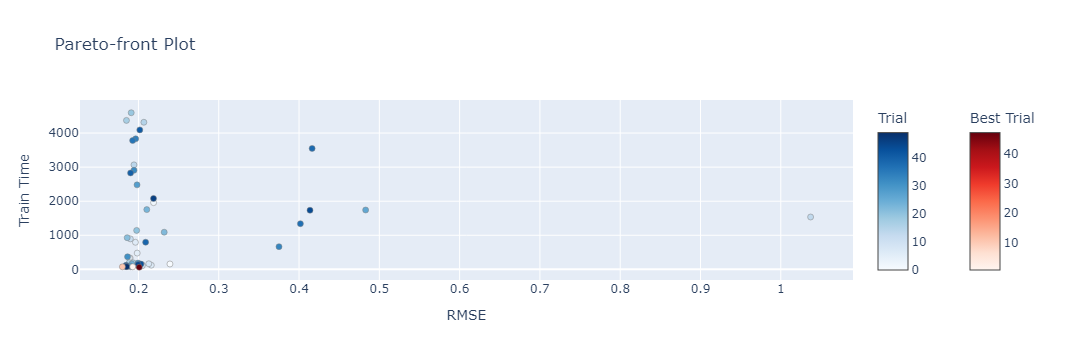

Number of trials on the Pareto front: 3
Trial with highest accuracy: 
	number: 11
	params: {'tamanio_ventana': 7, 'cantidad_unidades': 30}
	values: [0.1800113031578929, 73.77507170041402]


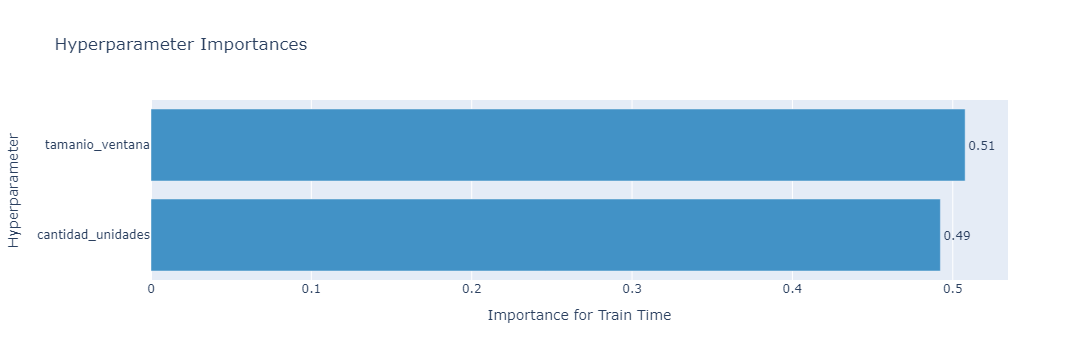

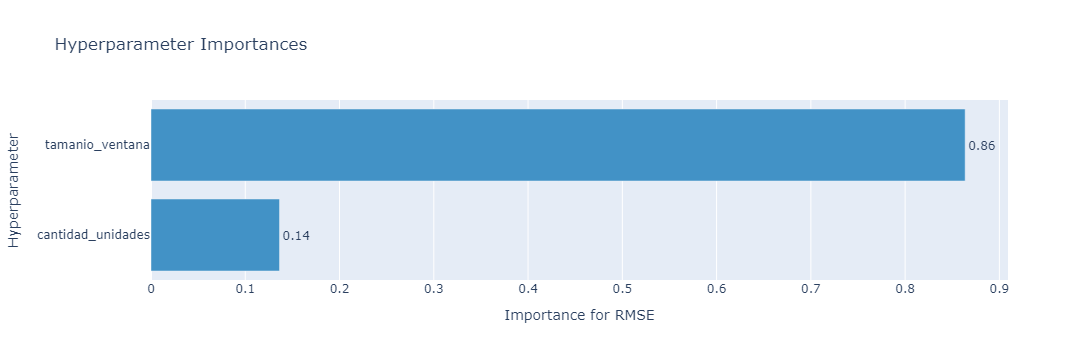

50
    trial   value_0      value_1  tamanio_ventana  cantidad_unidades  \
11     11  0.180011    73.775072                7                 30   
48     48  0.184229    87.257478                7                 15   
42     42  0.184566   118.341023               15                 30   
17     17  0.185068  4371.876650              730                 30   
49     49  0.185501    79.127753                7                 30   
21     21  0.185994   928.254295              180                 60   
31     31  0.186407   369.240303               60                 60   
16     16  0.188571   198.935895               30                 30   
4       4  0.188665   331.736484               60                 60   
3       3  0.189685   332.692537               60                 30   

    mean_rmse  min_rmse  max_rmse  maxError_mean   r2_mean  elapsed_time  
11   0.180011  0.178369  0.180854       1.934792  0.988390     73.775072  
48   0.184229  0.179261  0.190311       1.917288  0.98

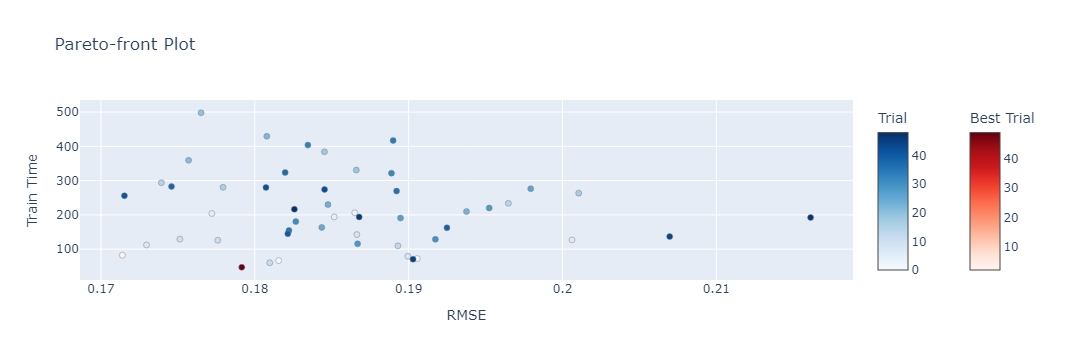

Number of trials on the Pareto front: 2
Trial with highest accuracy: 
	number: 2
	params: {'tamanio_ventana': 60, 'cantidad_unidades': 365}
	values: [0.17139402065902068, 82.18835783004761]


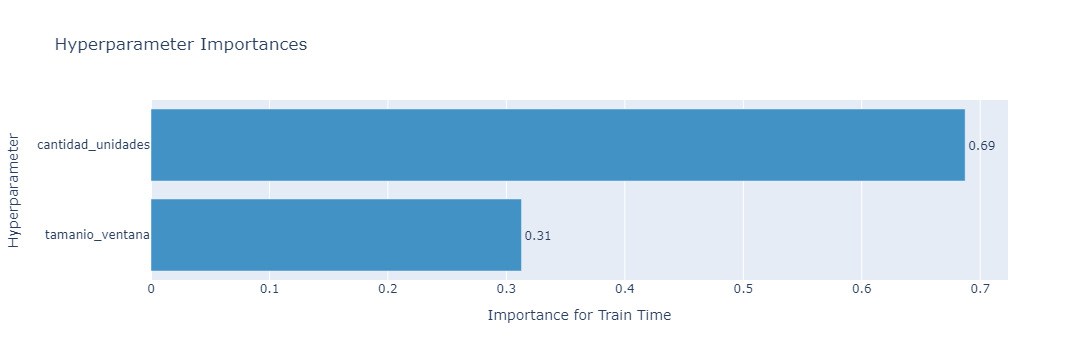

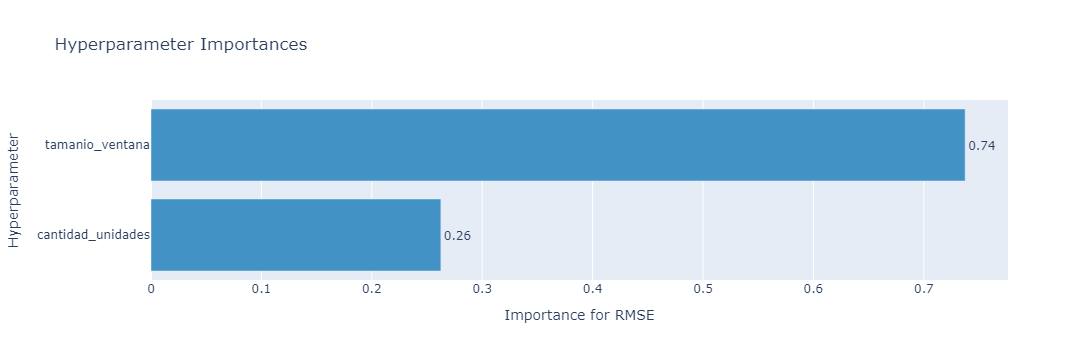

50
    trial   value_0     value_1  tamanio_ventana  cantidad_unidades  \
2       2  0.171394   82.188358               60                365   
41     41  0.171525  255.875483              180                180   
7       7  0.172965  112.258098              180                365   
15     15  0.173929  293.905423              545                365   
38     38  0.174587  282.769030              545                 60   
10     10  0.175129  129.195930              365                 60   
21     21  0.175698  359.164850              180                 30   
20     20  0.176508  498.078771              545                 15   
5       5  0.177208  203.974889              365                365   
11     11  0.177594  125.865788               60                 60   

    mean_rmse  min_rmse  max_rmse  maxError_mean   r2_mean  elapsed_time  
2    0.171394  0.171094  0.171667       1.937364  0.989475     82.188358  
41   0.171525  0.170950  0.172319       1.920721  0.989459    255

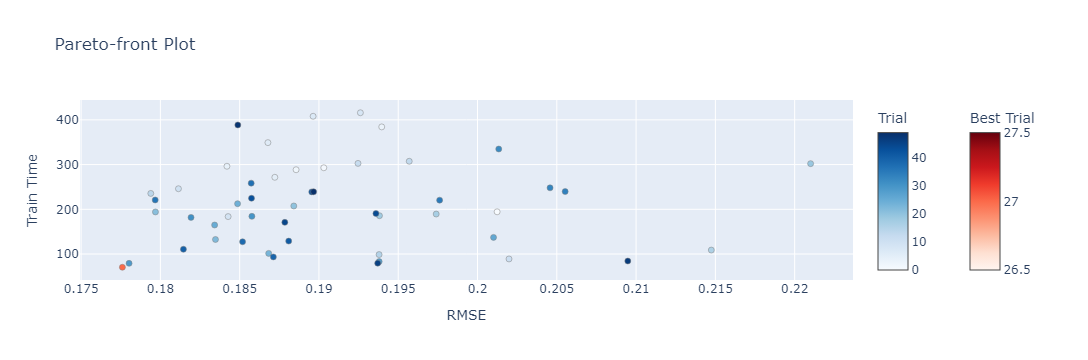

Number of trials on the Pareto front: 1
Trial with highest accuracy: 
	number: 27
	params: {'tamanio_ventana': 15, 'cantidad_unidades': 180}
	values: [0.17760464545629293, 70.4542571703593]


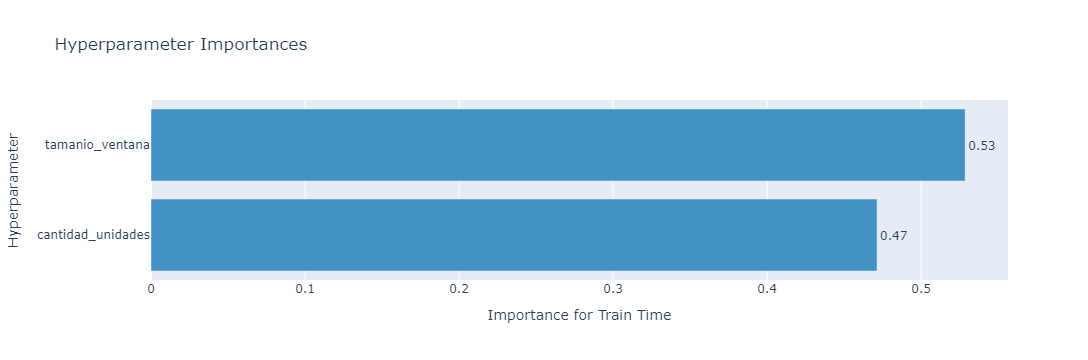

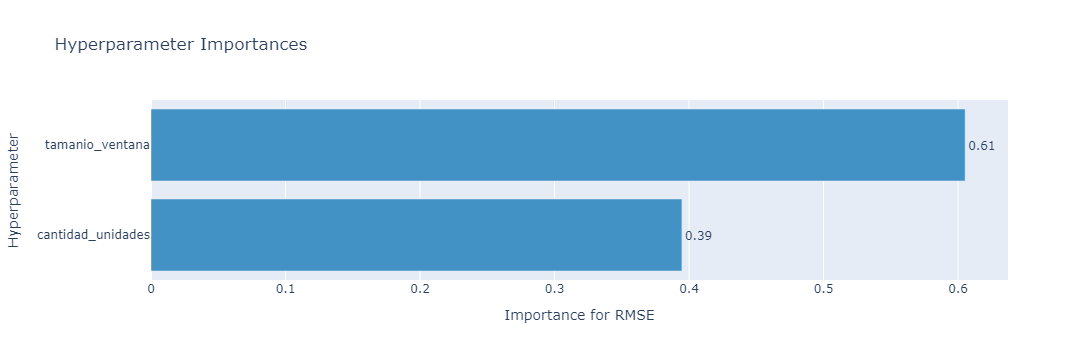

50
    trial   value_0     value_1  tamanio_ventana  cantidad_unidades  \
27     27  0.177605   70.454257               15                180   
29     29  0.178025   79.213479               15                 30   
14     14  0.179395  235.527321               30                 15   
36     36  0.179672  220.879256               60                 30   
21     21  0.179690  194.094390               30                365   
10     10  0.181138  246.008036              180                365   
40     40  0.181452  110.704564               30                365   
31     31  0.181933  181.919773              365                365   
25     25  0.183421  164.891570              180                 30   
22     22  0.183475  132.536223                7                 60   

    mean_rmse  min_rmse  max_rmse  maxError_mean   r2_mean  elapsed_time  
27   0.177605  0.174616  0.182747       1.971597  0.988694     70.454257  
29   0.178025  0.175831  0.179945       1.941053  0.988644     79

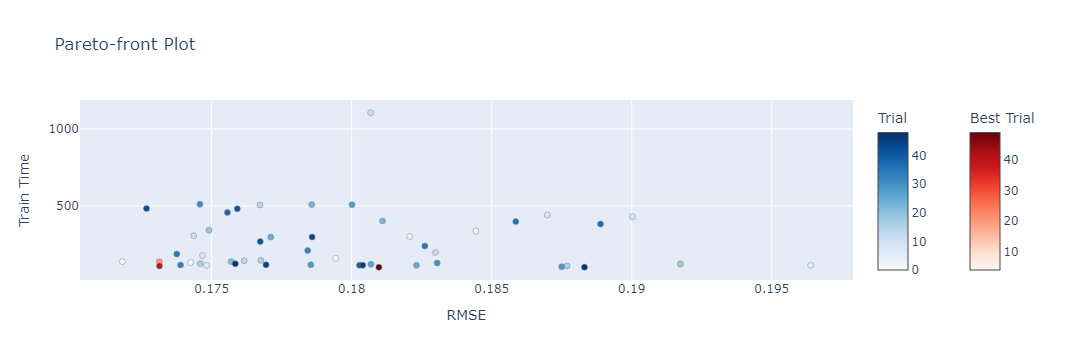

Number of trials on the Pareto front: 4
Trial with highest accuracy: 
	number: 4
	params: {'tamanio_ventana': 30, 'cantidad_unidades': 180}
	values: [0.17181354644809863, 138.46887135505676]


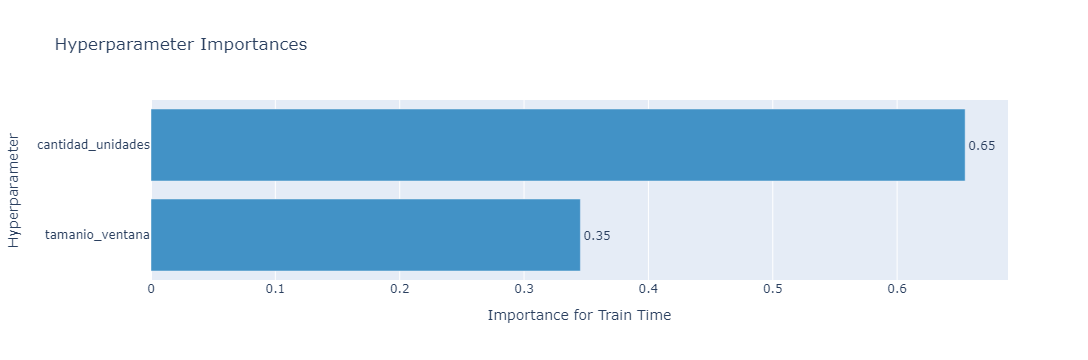

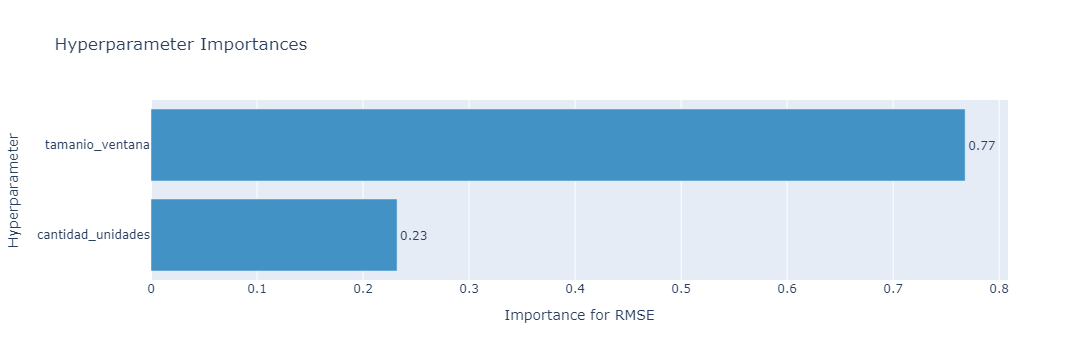

50
    trial   value_0     value_1  tamanio_ventana  cantidad_unidades  \
4       4  0.171814  138.468871               30                180   
43     43  0.172674  483.622892              365                365   
20     20  0.173131  136.765503               15                180   
39     39  0.173137  109.872240               30                 30   
34     34  0.173756  187.001215               60                365   
33     33  0.173891  116.297493               15                 30   
1       1  0.174251  132.121043               30                 60   
11     11  0.174361  306.231776              365                 60   
31     31  0.174584  510.745134              730                 15   
16     16  0.174594  125.377216               30                 15   

    mean_rmse  min_rmse  max_rmse  maxError_mean   r2_mean  elapsed_time  
4    0.171814  0.170771  0.173767       1.923661  0.989727    138.468871  
43   0.172674  0.171126  0.175363       1.898403  0.989623    483

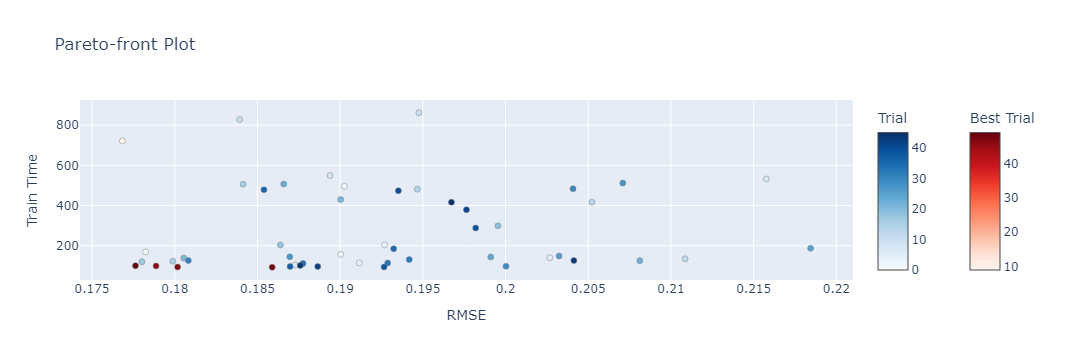

Number of trials on the Pareto front: 5
Trial with highest accuracy: 
	number: 9
	params: {'tamanio_ventana': 730, 'cantidad_unidades': 7}
	values: [0.17683496676329583, 721.9140419165293]


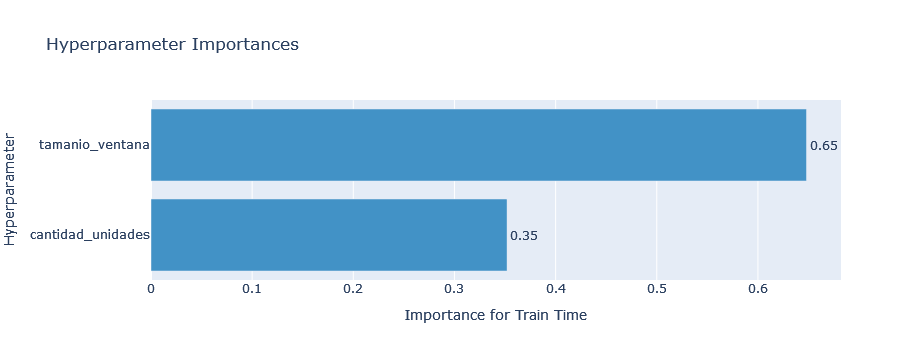

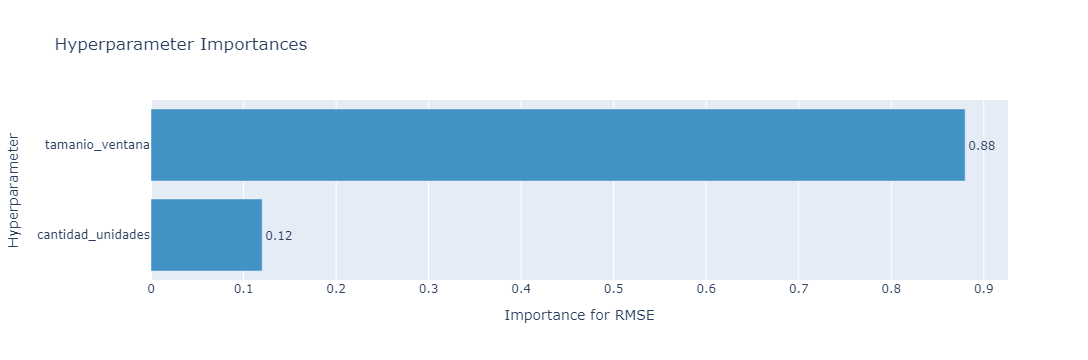

50
    trial   value_0     value_1  tamanio_ventana  cantidad_unidades  \
9       9  0.176835  721.914042              730                  7   
49     49  0.177626  100.515166               15                180   
17     17  0.178015  119.614240                7                365   
0       0  0.178239  169.298324               30                 15   
46     46  0.178871   99.417947               30                  7   
15     15  0.179883  122.811460               15                365   
47     47  0.180172   93.579229                7                180   
20     20  0.180545  138.544949               15                 30   
31     31  0.180820  126.138386               60                 15   
11     11  0.183925  828.123415              730                180   

    mean_rmse  min_rmse  max_rmse  maxError_mean   r2_mean  elapsed_time  
9    0.176835  0.170333  0.187417       1.909168  0.989098    721.914042  
49   0.177626  0.171163  0.189541       1.882956  0.988996    100

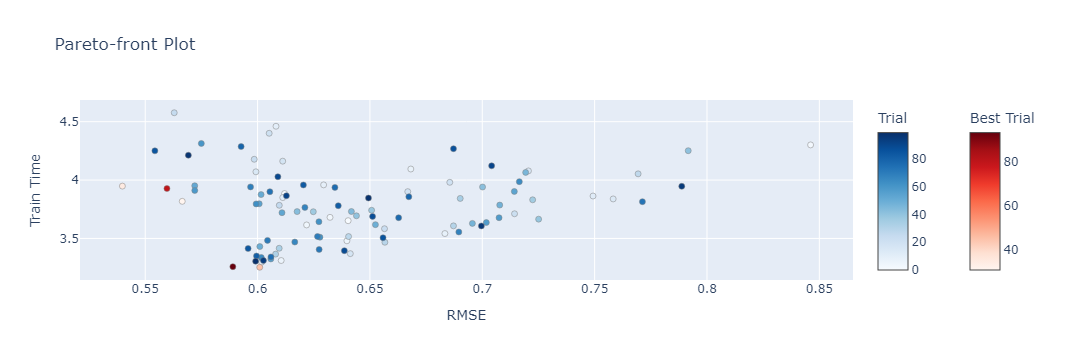

Number of trials on the Pareto front: 5
Trial with highest accuracy: 
	number: 35
	params: {'anho': 83, 'tamanio_ventana': 15, 'cantidad_unidades': 15, 'batch': 15, 'features': 2, 'dropout': 0.22399512304633118}
	values: [0.539842230445945, 3.9481853961944586]


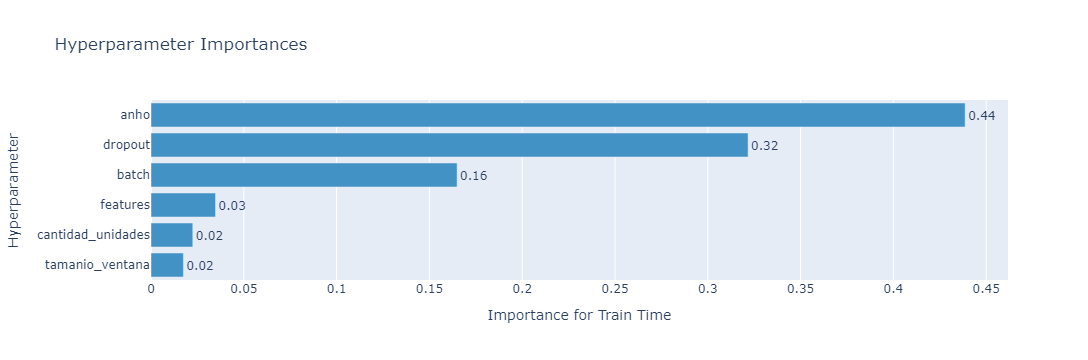

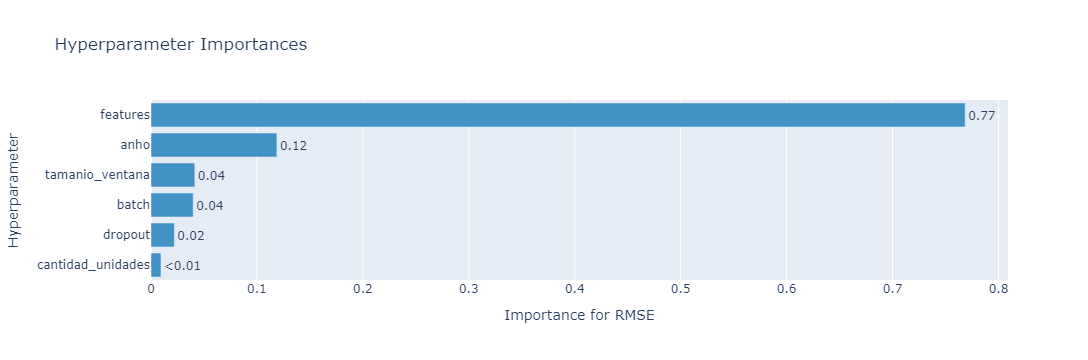

100
    trial   value_0   value_1  anho  tamanio_ventana  cantidad_unidades  \
35     35  0.539842  3.948185    83               15                 15   
85     85  0.554300  4.250238    83              730                 15   
80     80  0.559662  3.927575    83              545                 15   
25     25  0.562908  4.576481    88              180                180   
31     31  0.566473  3.817919    83              365                365   
97     97  0.569194  4.212845    88               30                180   
52     52  0.572031  3.951208    83              545                 15   
59     59  0.572052  3.910955    83              365                 15   
60     60  0.574970  4.313505    88               30                365   
93     93  0.588994  3.258487    88               30                180   

    batch  features   dropout  mean_rmse  min_rmse  max_rmse  maxError_mean  \
35     15         2  0.223995   0.539842  0.539842  0.539842       3.948185   
85      7   

In [8]:
lists=['optunah7RNN','optunah7RNN1','optunah7GRU','optunah7LSTM','optunah7LSTMv1','optunah7LSTMfeaturesMes','optunah28LSTMFinal']
for modelo in lists:
    study=load( open('modelos/'+modelo+'.pkl', 'rb'))
    print(modelo)
    fig = optuna.visualization.plot_pareto_front(study,target_names=["RMSE", "Train Time"])
    fig.show()
    print(f"Number of trials on the Pareto front: {len(study.best_trials)}")

    trial_with_highest_accuracy = max(study.best_trials, key=lambda t: t.values[1])
    print(f"Trial with highest accuracy: ")
    print(f"\tnumber: {trial_with_highest_accuracy.number}")
    print(f"\tparams: {trial_with_highest_accuracy.params}")
    print(f"\tvalues: {trial_with_highest_accuracy.values}")
    fig=optuna.visualization.plot_param_importances(study, target=lambda t: t.values[0], target_name="Train Time")
    fig.show()
    fig=optuna.visualization.plot_param_importances(study, target=lambda t: t.values[1], target_name="RMSE")
    fig.show()   
# trials = study.get_trials()
    frozen_trials = study.get_trials()

    # Convert the frozen trials list to a Pandas DataFrame
    data = []
    for trial in frozen_trials:
        if(trial.state==optuna.trial.TrialState.COMPLETE):
            trial_values = trial.values
            trial_params = trial.params
            trial_user_attrs = trial.user_attrs
            row = {}
            row['trial']= trial.number
            for i, value in enumerate(trial_values):
                row[f'value_{i}'] = value
            for key, value in trial_params.items():
                row[key] = value
            for key, value in trial_user_attrs.items():
                row[key] = value
            data.append(row)
    df = pd.DataFrame(data)
    print(len(df))
    print(df.sort_values(by=['value_0','value_1']).head(10))

 

In [12]:
#'optunah28LSTMweekyear'
lists=['optunah28LSTMweekyearStations','optunah28LSTMweekyearNormold','optunah28LSTMweekyearStationsnorm','optunah28LSTMweekyearNorm']
for modelo in lists:
    study=load( open('modelos/'+modelo+'.pkl', 'rb'))
    #fig = optuna.visualization.plot_pareto_front(study,target_names=["RMSE","MaxError", "Train Time"])
    #fig.show()
    print(modelo)
    print(f"Number of trials on the Pareto front: {len(study.best_trials)}")

    trial_with_highest_accuracy = max(study.best_trials, key=lambda t: t.values[1])
    print(f"Trial with highest accuracy: ")
    print(f"\tnumber: {trial_with_highest_accuracy.number}")
    print(f"\tparams: {trial_with_highest_accuracy.params}")
    print(f"\tvalues: {trial_with_highest_accuracy.values}")
    #fig = optuna.visualization.plot_param_importances(study, target=lambda t: t.values[0], target_name="RMSE")
    #fig.show()
    #fig = optuna.visualization.plot_param_importances(study, target=lambda t: t.values[1], target_name="MaxError")
    #fig.show()
    #fig = optuna.visualization.plot_param_importances(study, target=lambda t: t.values[2], target_name="TrainTime")
    #fig.show()
   # trials = study.get_trials()
    frozen_trials = study.get_trials()

    # Convert the frozen trials list to a Pandas DataFrame
    data = []
    for trial in frozen_trials:
        if(trial.state==optuna.trial.TrialState.COMPLETE):
            trial_values = trial.values
            trial_params = trial.params
            trial_user_attrs = trial.user_attrs
            row = {}
            row['trial']= trial.number
            for i, value in enumerate(trial_values):
                row[f'value_{i}'] = value
            for key, value in trial_params.items():
                row[key] = value
            for key, value in trial_user_attrs.items():
                row[key] = value
            data.append(row)
    df = pd.DataFrame(data)
    print(len(df))
    print(df.sort_values(by=['value_0','value_1','value_2']).head(10))

 

optunah28LSTMweekyearStations
Number of trials on the Pareto front: 6
Trial with highest accuracy: 
	number: 49
	params: {'tamanio_ventana': 60, 'cantidad_unidades': 15}
	values: [0.7739864345684248, 4.786397129694621, 35.914689699808754]
50
    trial   value_0   value_1     value_2  tamanio_ventana  cantidad_unidades  \
2       2  0.689699  4.293559   98.907670              180                  7   
43     43  0.694867  4.321684  115.551878                7                  7   
34     34  0.697264  4.532390  185.096286              545                  7   
36     36  0.702604  4.667578  164.515098              545                 15   
10     10  0.702670  4.426854  130.095255              545                 15   
38     38  0.704485  4.460285  233.697102               30                  7   
45     45  0.706628  4.666390   67.041547                7                  7   
24     24  0.710485  4.565486   49.326716               60                  7   
8       8  0.712430  4.385801